In [1]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random

In [2]:
project_path = Path.cwd().parent
data_path = project_path / 'data'

class_paths = list(data_path.iterdir())
class_names = [filepath.name for filepath in class_paths]

display(class_paths)
display(class_names)

[WindowsPath('d:/Users/Pablo/Desktop/Proyectos/QuePlantaEs/data/ficus_benjamina'),
 WindowsPath('d:/Users/Pablo/Desktop/Proyectos/QuePlantaEs/data/sansevieria'),
 WindowsPath('d:/Users/Pablo/Desktop/Proyectos/QuePlantaEs/data/spathiphyllum')]

['ficus_benjamina', 'sansevieria', 'spathiphyllum']

In [3]:
# Count images per class

for class_path in class_paths:
    counter = 0
    images_paths = class_path.iterdir()
    for image_path in images_paths:
        counter += 1
    print(counter)

377
433
423


In [4]:
# # Delete corrupted image files

# for class_path in class_paths:
#     images_paths = class_path.iterdir()

#     for image_path in images_paths:
#         try:
#             with Image.open(image_path) as img:
#                 img.verify()
#         except Exception as e:
#             image_path.unlink()

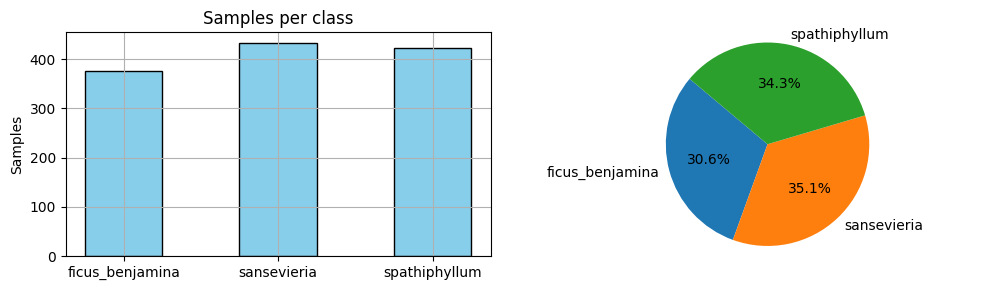

In [5]:
# Count images per class

class_samples = []

for class_path in class_paths:
    counter = 0
    images_paths = class_path.iterdir()
    for image_path in images_paths:
        counter += 1
    class_samples.append(counter)

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Grafico de barras
axs[0].bar(class_names, class_samples, color='skyblue', edgecolor='black', width = 0.5)
# axs[0].set_xlabel('Class name')
axs[0].set_ylabel('Samples')
axs[0].set_title('Samples per class')
axs[0].grid(True)
# axs[0].tick_params(axis='x', rotation=90)

# Gráfico de torta
axs[1].pie(class_samples, labels=class_names, autopct='%1.1f%%', startangle=140)
# axs[1].set_title('Class balance')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

In [6]:
# # Rename image files

# for class_path in class_paths:
#     images_paths = class_path.iterdir()

#     for idx, image_path in enumerate(images_paths):
#         extension = image_path.suffix.lower()  # .jpg, .jpeg, .png, etc.
#         new_name = f"image{idx}{extension}"
#         new_path = class_path / new_name
#         image_path.rename(new_path)

In [7]:
# Generate dataset

data = {}

for class_path in class_paths:
    class_name = class_path.name
    data[class_name] = list(class_path.iterdir())

In [8]:
# Get images width and height

aspect_ratio_dict = {}

for class_name in class_names:
    aspect_ratio_dict[class_name] = []
    images_paths = data[class_name]
    for image_path in images_paths:
        with Image.open(image_path) as img:
            width, height = img.size
            aspect_ratio_dict[class_name].append((width, height))

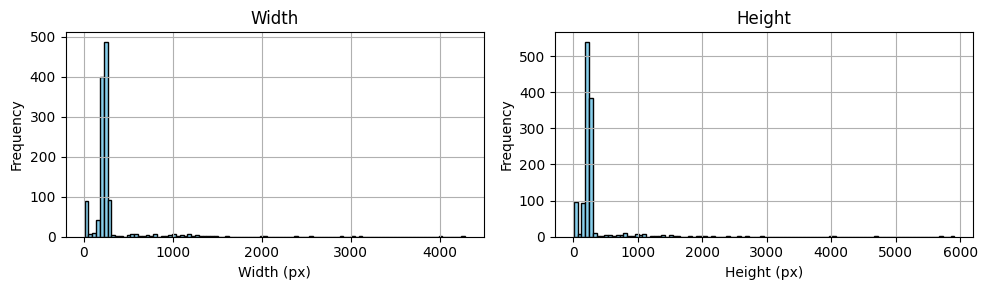

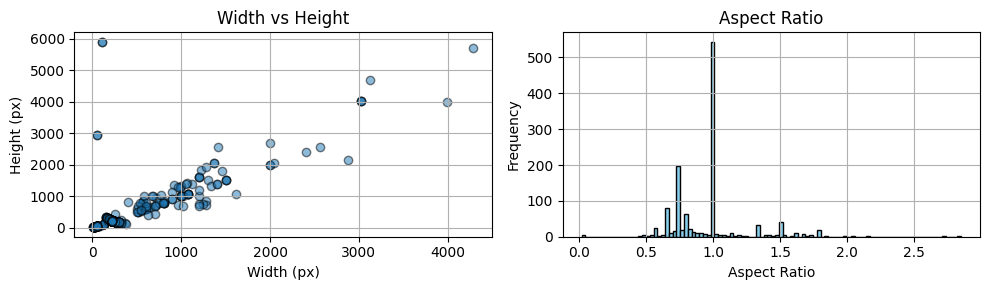

In [9]:
widths = []
heights = []
aspect_ratios = []

for class_name in class_names:
    for aspect_ratio in aspect_ratio_dict[class_name]:
        widths.append(aspect_ratio[0])
        heights.append(aspect_ratio[1])

df_aspect_ratio = pd.DataFrame({'width': widths,
                                'height': heights,
                                'aspect_ratio': np.array(widths) / np.array(heights)
                                })

# Plot widths and heights

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(df_aspect_ratio['width'], bins=100, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Width (px)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Width')
axs[0].grid(True)

axs[1].hist(df_aspect_ratio['height'], bins=100, color='skyblue', edgecolor='black')
axs[1].set_xlabel('Height (px)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Height')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Plot aspect ratios

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].scatter(df_aspect_ratio['width'], df_aspect_ratio['height'], alpha=0.5, edgecolors='black')
axs[0].set_xlabel('Width (px)')
axs[0].set_ylabel('Height (px)')
axs[0].set_title('Width vs Height')
axs[0].grid(True)

axs[1].hist(df_aspect_ratio['aspect_ratio'], bins=100, color='skyblue', edgecolor='black')
axs[1].set_xlabel('Aspect Ratio')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Aspect Ratio')
axs[1].grid(True)

plt.tight_layout()
plt.show()

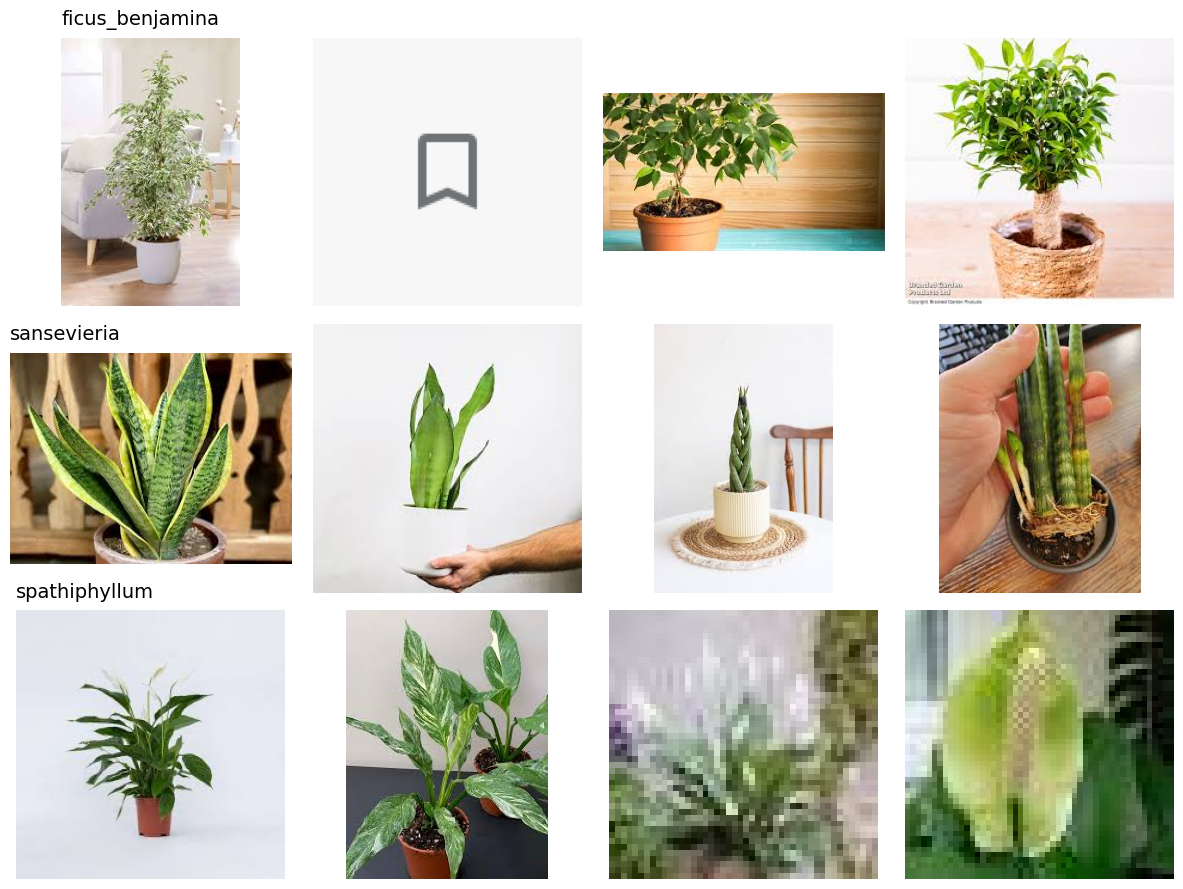

In [10]:
# Plot class samples

random.seed(0)

num_imgs = 4
num_classes = len(class_names)

fig, axs = plt.subplots(num_classes, num_imgs, figsize=(num_imgs * 3, num_classes * 3))

for row_idx, (class_name, image_paths) in enumerate(data.items()):
    selected_imgs = random.sample(image_paths, min(num_imgs, len(image_paths)))
    for col_idx in range(num_imgs):
        ax = axs[row_idx][col_idx] if num_classes > 1 else axs[col_idx]
        img = Image.open(selected_imgs[col_idx]).convert("RGB")
        ax.imshow(img)
        ax.axis('off')
        if col_idx == 0:
            ax.set_title(class_name, fontsize=14, loc='left', pad=10)

plt.tight_layout()
plt.show()